In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load raw data
file_path = "../data/raw/KaggleV2-May-2016.csv"
df = pd.read_csv(file_path)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
print("data shape :", df.shape)
df.info()
df.describe(include="all").T.head(15)

data shape : (110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527.0,NaN,NaN,NaN,147496265710394.0625,256094920291738.84375,39217.84439,4172614444192.0,31731838713978.0,94391720898175.0,999981631772427.0
AppointmentID,110527.0,NaN,NaN,NaN,5675305.123427,71295.75154,5030230.0,5640285.5,5680573.0,5725523.5,5790484.0
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527.0,NaN,NaN,NaN,37.088874,23.110205,-1.0,18.0,37.0,55.0,115.0
Neighbourhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527.0,NaN,NaN,NaN,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,NaN,NaN,NaN,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,NaN,NaN,NaN,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.dtypes[["ScheduledDay", "AppointmentDay"]]


ScheduledDay      object
AppointmentDay    object
dtype: object

In [8]:
df["ScheduledDT"]   = pd.to_datetime(df["ScheduledDay"].str.replace("Z","", regex=False),
                                     errors="coerce")
df["AppointmentDT"] = pd.to_datetime(df["AppointmentDay"].str.replace("Z","", regex=False),
                                     errors="coerce")

df["AppointmentWeekday"] = df["AppointmentDT"].dt.day_name()
df["ScheduledDate"]      = df["ScheduledDT"].dt.date
df["NoShow"] = (df["No-show"] == "Yes")


In [9]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["AppointmentWeekday"] = pd.Categorical(df["AppointmentWeekday"], categories=weekday_order, ordered=True)

In [10]:
total_appointments = len(df)
total_noshow = (df['NoShow']).sum()
noshow_rate = total_noshow / total_appointments * 100

print(f"total reservation: {total_appointments:,}")
print(f"Number of No-show: {total_noshow:,}")
print(f"No-show rate: {noshow_rate:.2f}%")

total reservation: 110,527
Number of No-show: 22,319
No-show rate: 20.19%


In [12]:
weekday_summary = (
    df.groupby("AppointmentWeekday", observed=False)
    .agg(Appointments = ("NoShow", "size"),
         NoShows=("NoShow", "sum"))
    .assign(NoShowRate=lambda t: t["NoShows"]/t["Appointments"])
    .reset_index()
)

display(weekday_summary)

,AppointmentWeekday,Appointments,NoShows,NoShowRate
0,Monday,22715,4690,0.206471
1,Tuesday,25640,5152,0.200936
2,Wednesday,25867,5093,0.196892
3,Thursday,17247,3338,0.193541
4,Friday,19019,4037,0.212261
5,Saturday,39,9,0.230769
6,Sunday,0,0,NaN


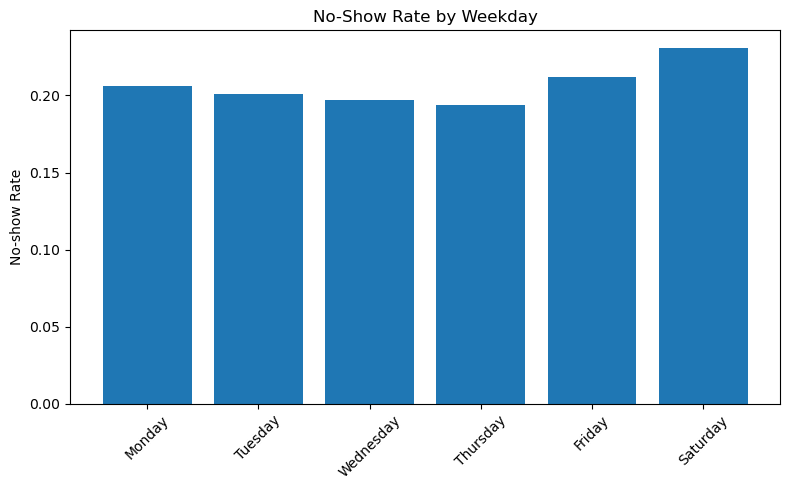

saved chart to: ../assets/no_show_rate_by_weekday.png


In [21]:
plt.figure(figsize = (8,5))
plt.bar(weekday_summary["AppointmentWeekday"].astype(str), weekday_summary["NoShowRate"])
plt.title("No-Show Rate by Weekday")
plt.ylabel("No-show Rate")
plt.xticks(rotation=45)
plt.tight_layout()

os.makedirs("../assets", exist_ok = True)
save_path = "../assets/no_show_rate_by_weekday.png"
plt.savefig(save_path, dpi=150, bbox_inches="tight", facecolor="white")
plt.show()
print(f"saved chart to: {save_path}")

In [18]:
os.makedirs("../data/processed", exist_ok=True)
weekday_summary.to_csv("../data/processed/weekday_noshow_summary.csv", index=False)
print("Saved table to ../data/processed/weekday_noshow_summary.csv")

Saved table to ../data/processed/weekday_noshow_summary.csv
